### 1. 목표설정
- 보스턴 집 데이터를 바탕으로 주택가격을 예측해보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. 데이터 수집
- 학습용 보스턴 집값 데이터 로드

In [ ]:
# 사이킷런에서 지원하는 학습용 보스턴 집 값 데이터셋 임포트
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
boston

In [ ]:
boston.keys()

In [ ]:
# data : 문제 데이터
# target : 정답 데이터
# feature_names : 컬럼(특성)명
# DESCR : 데이터 설명
# filename : 파일명 및 경로

In [ ]:
boston['data'].shape

In [ ]:
boston['target'].shape

In [ ]:
boston['feature_names']

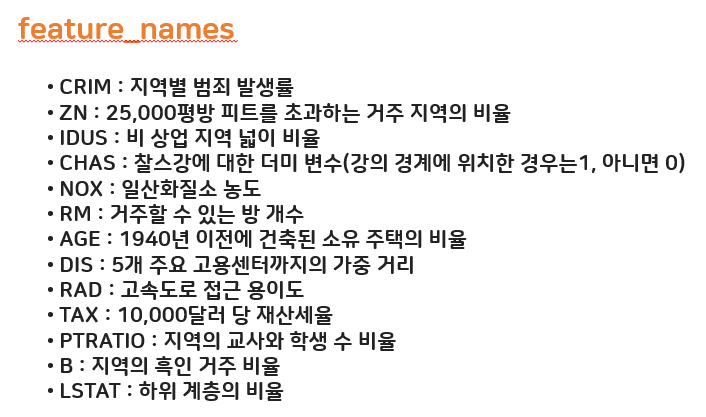

### 3. 데이터 전처리
- 필요없음

### 4. 탐색적 데이터 분석
- 생략

### 5. 모델링(모델선택, 학습, 평가)
- 선형회귀 모델 사용
- 문제, 정답 데이터 설정
- 학습, 평가 데이터 설정

In [ ]:
# 문제 데이터 데이터프레임화
dfX = pd.DataFrame(boston['data'],
                   columns=boston['feature_names']
                  )
dfX

In [ ]:
# 정답 데이터 데이터프레임화
dfY = pd.DataFrame(boston['target'],
                   columns=['price']
                  )
dfY

In [ ]:
dfX.info()

In [ ]:
dfY.info()

In [ ]:
# 특성별 상관관계 파악
dfX.corr()

In [ ]:
# 상관계수 히트맵 출력
plt.figure(figsize=(15,15))

sns.heatmap(data=dfX.corr(),
            annot=True,                  # annotation : 각 셀 수치값 표시
            annot_kws={'size':12},        # 수치 사이즈 설정
            fmt ='.2f',                   # 수치값 소수 2째 자리까지 표시
            cmap='Greens'                 # 히트맵 색상 설정
           );

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY,
                                                    test_size=0.3,
                                                    random_state=5
                                                   )

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#### 선형회귀 모델 적용

In [ ]:
# 선형회귀 모델 임포트
from sklearn.linear_model import LinearRegression
# 평균제곱오차(MSE) 평가지표 임포트
from sklearn.metrics import mean_squared_error

In [ ]:
# 선형회귀 모델은 하이퍼파라미터가 없음
linear_model = LinearRegression()

In [ ]:
# 모델 학습
linear_model.fit(X_train, y_train)

In [ ]:
X_train.shape

In [ ]:
# 특성의 개수(13개)만큼 w값이 출력
# y = w1x1 + w2x2 + ... + w12x12 + w13x13 +b
linear_model.coef_

In [ ]:
# b값은 상수이기 때문에 하나
linear_model.intercept_

In [ ]:
# 정답 예측
pre_train = linear_model.predict(X_train)
pre_test = linear_model.predict(X_test)

In [ ]:
pre_train

In [ ]:
y_train

#### 모델 평가
- MSE, RMSE 확인

In [ ]:
# MSE ; 평균제곱오차
train_mse = mean_squared_error(pre_train, y_train)
test_mse = mean_squared_error(pre_test, y_test)

# MSE 확인
print('train 데이터 MSE:' , train_mse)
print('test 데이터 MSE:' , test_mse)
print('train, test의 MSE 차이:', test_mse - train_mse)

print('='*45)

# RMSE 확인(MSE에 0.5제곱 해주기)
print('train 데이터 RMSE:' , train_mse**0.5)
print('test 데이터 RMSE:' , test_mse**0.5)
print('train, test의 RMSE 차이:', test_mse**0.5 - train_mse**0.5)

In [ ]:
# 정답 데이터(집 가격)의 평균수치를 확인해보자!
print('train데이터 주택가격 평균:', y_train['price'].mean())
print('train데이터 주택가격 평균:', y_test['price'].mean())

#### train 데이터의 경우 평균 집값 22.5만 달러에서 오차인 RMSE는 4.3만 달러 정도정도네!

- R2 스코어 확인

In [ ]:
# train 데이터의 R2스코어
linear_model.score(X_train, y_train)

In [ ]:
# test 데이터의 R2스코어
linear_model.score(X_test, y_test)

- R2 스코어 값이 애매해서 좀 더 올려보자!

### 선형회귀 모델 특성확장
- 데이터 전체의 특성을 더 늘려보자!
- 선형회귀는 특성이 적으면(모델이 간단하면) 성능이 낮게 나옴(하이퍼파라미터 조정이 불가능하기 때문)
- 각 특성들의 데이터를 곱하여 새로운 특성으로 만들어보자!

In [ ]:
# copy : 기존의 데이터는 그대로 두면서 새로운 변수명에 값을 넣어 줌
# copy 없이 X_train을 새 변수에 담아주면 변수의 내용이 바뀌면 X_train도 같이 바뀜
extended_X_train = X_train.copy()

In [ ]:
a = [1,2,3]
b = a

In [ ]:
b[0] = 0
b

In [ ]:
a

In [ ]:
X_train.columns

In [ ]:
# X_train의 각 컬럼들 서로서로 한번씩 곱해서 새로운 컬럼으로 추가시켜주자!
for col1 in X_train.columns :      # 13번 반복
    for col2 in X_train.columns :  # 13번 반복
        # 새로운 컬럼을 만들어서 데이터프레임에 계속 추가해주기!(곱해서 추가)
        extended_X_train[col1 + 'x' + col2] = X_train[col1] * X_train[col2]

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
extended_X_train

In [ ]:
extended_X_train.shape

In [ ]:
# test
extended_X_test = X_test.copy()

In [ ]:
# X_test의 각 컬럼들 서로서로 한번씩 곱해서 새로운 컬럼으로 추가시켜주자!
for col1 in X_test.columns :      # 13번 반복
    for col2 in X_test.columns :  # 13번 반복
        # 새로운 컬럼을 만들어서 데이터프레임에 계속 추가해주기!(곱해서 추가)
        extended_X_test[col1 + 'x' + col2] = X_test[col1] * X_test[col2]

In [ ]:
extended_X_test.shape

In [ ]:
# 특성확장된 train데이터의 문제와 정답데이터로 학습
linear_model2 = LinearRegression()
linear_model2.fit(extended_X_train, y_train)

In [ ]:
# 특성 확장된 문제 데이터로 정답 예측
ex_pre_train = linear_model2.predict(extended_X_train)
ex_pre_test = linear_model2.predict(extended_X_test)

In [ ]:
# 특성 확장후 MSE, RMSE
ex_train_mse = mean_squared_error(ex_pre_train, y_train)
ex_test_mse = mean_squared_error(ex_pre_test, y_test)

# MSE 확인
print('train 데이터 MSE:' , ex_train_mse)
print('test 데이터 MSE:' , ex_test_mse)
print('train, test의 MSE 차이:', ex_test_mse - ex_train_mse)

print('='*45)

# RMSE 확인(MSE에 0.5제곱 해주기)
print('train 데이터 RMSE:' , ex_train_mse**0.5)
print('test 데이터 RMSE:' , ex_test_mse**0.5)
print('train, test의 RMSE 차이:', ex_test_mse**0.5 - ex_train_mse**0.5)

In [ ]:
linear_model2.score(extended_X_train, y_train)

In [ ]:
linear_model2.score(extended_X_test, y_test)

- 특성확장(복잡도↑)을 했더니 결과가 훨씬 좋게 나오는 것을 확인할 수 있음

- '+'로 특성확장

In [ ]:
ex_X_train = X_train.copy()
ex_X_test = X_test.copy()

In [ ]:
for col1 in X_train.columns :      # 13번 반복
    for col2 in X_train.columns :  # 13번 반복
        # 새로운 컬럼을 만들어서 데이터프레임에 계속 추가해주기!(곱해서 추가)
        ex_X_train[col1 + '+' + col2] = X_train[col1] + X_train[col2]

In [ ]:
for col1 in X_test.columns :      # 13번 반복
    for col2 in X_test.columns :  # 13번 반복
        # 새로운 컬럼을 만들어서 데이터프레임에 계속 추가해주기!(곱해서 추가)
        ex_X_test[col1 + '+' + col2] = X_test[col1] + X_test[col2]

In [ ]:
linear_model3 = LinearRegression()
linear_model3.fit(ex_X_train, y_train)   # +로 확장된 X_train 데이터를 넣어줌

In [ ]:
linear_model3.score(ex_X_train, y_train)

In [ ]:
linear_model3.score(ex_X_test, y_test)

### 규제 모델을 적용해보자!

#### 라쏘(Lasso) 모델 적용

In [ ]:
# 경고메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# alpha 값으로 규제의 강도를 설정 가능
# alpha 값이 높아지면 규제의 강도가 쎄지고 과대적합의 위험성이 줄어듦
lasso_model = Lasso(alpha = 10)

In [ ]:
lasso_model.fit(extended_X_train, y_train)

In [ ]:
lasso_model.coef_

In [ ]:
# 라쏘는 필요없는 특성의 w값을 0으로 만들어주기 때문에 0이 아닌 w값들의 개수를
# 구하면 학습에 사용된 특성이 몇 개인지 확인할 수 있음
print(f"사용한 특성의 수 : {np.sum(lasso_model.coef_!=0)}")

In [ ]:
pre_train_lasso = lasso_model.predict(extended_X_train)
pre_test_lasso = lasso_model.predict(extended_X_test)

In [ ]:
# 특성 확장후 MSE, RMSE
train_mse_la = mean_squared_error(pre_train_lasso, y_train)
test_mse_la = mean_squared_error(pre_test_lasso, y_test)

# MSE 확인
print('train 데이터 MSE:' , train_mse_la)
print('test 데이터 MSE:' , test_mse_la)
print('train, test의 MSE 차이:', test_mse_la - train_mse_la)

print('='*45)

# RMSE 확인(MSE에 0.5제곱 해주기)
print('train 데이터 RMSE:' , train_mse_la**0.5)
print('test 데이터 RMSE:' , test_mse_la**0.5)
print('train, test의 RMSE 차이:', test_mse_la**0.5 - train_mse_la**0.5)

In [ ]:
lasso_model.score(extended_X_train, y_train)  # 93 -> 85

In [ ]:
lasso_model.score(extended_X_test, y_test)    # 80 -> 81

- 선형회귀 모델에 비해서 train데이터의 오차는 약간 늘어났지만 과대적합이 줄어든것을 확인할 수 있음

#### 릿지(Ridge) 모델 적용

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=10)

In [ ]:
ridge_model.fit(extended_X_train, y_train)

In [ ]:
pre_train_ridge = ridge_model.predict(extended_X_train)
pre_test_ridge = ridge_model.predict(extended_X_test)

In [ ]:
# 특성 확장후 MSE, RMSE
train_mse_ri = mean_squared_error(pre_train_ridge, y_train)
test_mse_ri = mean_squared_error(pre_test_ridge, y_test)

# MSE 확인
print('train 데이터 MSE:' , train_mse_ri)
print('test 데이터 MSE:' , test_mse_ri)
print('train, test의 MSE 차이:', test_mse_ri - train_mse_ri)

print('='*45)

# RMSE 확인(MSE에 0.5제곱 해주기)
print('train 데이터 RMSE:' , train_mse_ri**0.5)
print('test 데이터 RMSE:' , test_mse_ri**0.5)
print('train, test의 RMSE 차이:', test_mse_ri**0.5 - train_mse_ri**0.5)

In [ ]:
ridge_model.score(extended_X_train, y_train)

In [ ]:
ridge_model.score(extended_X_test, y_test)

- alpha값이 10일때, 릿지모델에 비해서 라쏘모델이 과대적합 해소에 더 유리함

### 하이퍼파라미터 튜닝
- alpha값을 바꿔가며 RMSE를 확인해보자!

In [ ]:
# Lasso 모델
# alpha 값에 따라 RMSE 계산값을 빈 리스트에 하나씩 담아보자!
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]
lasso_train_list = []    # train의 RMSE 값을 넣어줄 빈 리스트
lasso_test_list = []     # test의 RMSE 값을 넣어줄 빈 리스트

for i in alpha_list :
    # 모델 불러오기
    lasso_model = Lasso(alpha=i)
    # 모델 학습
    lasso_model.fit(extended_X_train, y_train)
    
    # 학습된 모델로 train 데이터 예측
    lasso_train_pre = lasso_model.predict(extended_X_train)
    # RMSE 값 계산
    lasso_train_RMSE = mean_squared_error(lasso_train_pre, y_train)**0.5
    # 비어있는 리스트에 RMSE값 넣기
    lasso_train_list.append(lasso_train_RMSE)
    
    # 학습된 모델로 test 데이터 예측
    lasso_test_pre = lasso_model.predict(extended_X_test)
    # RMSE 값 계산
    lasso_test_RMSE = mean_squared_error(lasso_test_pre, y_test)**0.5
    # 비어있는 리스트에 RMSE값 넣기
    lasso_test_list.append(lasso_test_RMSE)

In [ ]:
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

In [ ]:
alpha_list

In [ ]:
# Lasso 모델의 train, test에 대한 RMSE 값을 그래프로 표현
plt.figure(figsize=(10,5))
plt.plot(lasso_train_list, label ='train')    # train 그래프
plt.plot(lasso_test_list, label ='test')      # test 그래프
plt.title("Lasso 모델 : alpha - RMSE 그래프")  # 그래프 제목
plt.xlabel('alpha값')                          # x축 라벨
plt.xticks(np.arange(6), alpha_list)           # x축 값 설정(개수, 실제값)
plt.ylabel('RMSE')                             # y축 라벨
plt.legend(prop={'size':20}, loc='lower center')
plt.grid()
plt.show()

In [ ]:
# Ridge 모델
# alpha 값에 따라 RMSE 계산값을 빈 리스트에 하나씩 담아보자!
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]
ridge_train_list = []    # train의 RMSE 값을 넣어줄 빈 리스트
ridge_test_list = []     # test의 RMSE 값을 넣어줄 빈 리스트

for i in alpha_list :
    # 모델 불러오기
    ridge_model = Ridge(alpha=i)
    # 모델 학습
    ridge_model.fit(extended_X_train, y_train)
    
    # 학습된 모델로 train 데이터 예측
    ridge_train_pre = ridge_model.predict(extended_X_train)
    # RMSE 값 계산
    ridge_train_RMSE = mean_squared_error(ridge_train_pre, y_train)**0.5
    # 비어있는 리스트에 RMSE값 넣기
    ridge_train_list.append(ridge_train_RMSE)
    
    # 학습된 모델로 test 데이터 예측
    ridge_test_pre = ridge_model.predict(extended_X_test)
    # RMSE 값 계산
    ridge_test_RMSE = mean_squared_error(ridge_test_pre, y_test)**0.5
    # 비어있는 리스트에 RMSE값 넣기
    ridge_test_list.append(ridge_test_RMSE)

In [ ]:
# ridge 모델의 train, test에 대한 RMSE 값을 그래프로 표현
plt.figure(figsize=(10,5))
plt.plot(ridge_train_list, label ='train')    # train 그래프
plt.plot(ridge_test_list, label ='test')      # test 그래프
plt.title("ridge 모델 : alpha - RMSE 그래프")  # 그래프 제목
plt.xlabel('alpha값')                          # x축 라벨
plt.xticks(np.arange(6), alpha_list)           # x축 값 설정(개수, 실제값)
plt.ylabel('RMSE')                             # y축 라벨
plt.legend(prop={'size':20}, loc='lower center')
plt.grid()
plt.show()

#### 보스턴 집 값 데이터에서는 Ridge 모델에 비해 Lasso 모델의 train,test 데이터의 RMSE값의 차이가 적기 때문에 과대적합에 좀 더 유리하다고 볼 수 있음
- Lasso 모델의 경우 alpha 값이 10일때 가장 과대적합에 유리하다고 볼 수 있음